# Analysis of Twitter Account `WeRateDogs` 

In [524]:
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
%matplotlib inline

from io import StringIO

## Gather

In [525]:
df_archive = pd.read_csv("twitter-archive-enhanced.csv", encoding="utf-8")

In [526]:
response = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
df_images = pd.read_csv(StringIO(response.text),sep="\t", encoding="utf-8")


In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [527]:
rows = []
with open("tweet-json.txt", encoding="utf-8") as file:
    for line in file:
        data = json.loads(line)
        rows.append(data)
    
df_stats = pd.DataFrame(rows)

## Assess

In [528]:
df_archive.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
443   819347104292290561                    NaN                  NaN   
1005  747651430853525504           7.476487e+17         4.196984e+09   
608   797971864723324932                    NaN                  NaN   
2281  667369227918143488                    NaN                  NaN   
1279  708845821941387268                    NaN                  NaN   

                      timestamp                                   source  \
443   2017-01-12 00:55:47 +0000  <a href="http://twitter.com/download...   
1005  2016-06-28 04:42:46 +0000  <a href="http://twitter.com/download...   
608   2016-11-14 01:18:12 +0000  <a href="http://twitter.com/download...   
2281  2015-11-19 15:49:57 +0000  <a href="http://twitter.com/download...   
1279  2016-03-13 02:43:08 +0000  <a href="http://twitter.com/download...   

                                         text  retweeted_status_id  \
443   Say hello to Anna and Elsa. They fal...                  NaN   
1005  Other pupper asked not to have his i...                  NaN   
608   Here's a helicopter pupper. He takes...                  NaN   
2281  Here we have a neat pup. Very white....                  NaN   
1279  Here's a pupper with magic eyes. Not...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
443                        NaN                        NaN   
1005                       NaN                        NaN   
608                        NaN                        NaN   
2281                       NaN                        NaN   
1279                       NaN                        NaN   

                                expanded_urls  rating_numerator  \
443   https://twitter.com/dog_rates/status...                12   
1005                                      NaN                12   
608   https://twitter.com/dog_rates/status...                12   
2281  https://twitter.com/dog_rates/status...                10   
1279  https://twitter.com/dog_rates/status...                 9   

      rating_denominator  name doggo floofer  pupper puppo  
443                   10  Anna  None    None    None  None  
1005                  10  None  None    None  pupper  None  
608                   10  None  None    None  pupper  None  
2281                  10  None  None    None    None  None  
1279                  10  None  None    None  pupper  None

In [529]:
df_archive.sample(5)[["tweet_id", "source", "text"]]

tweet_id                                   source  \
1959  673576835670777856  <a href="http://twitter.com/download...   
626   795076730285391872  <a href="http://twitter.com/download...   
16    888917238123831296  <a href="http://twitter.com/download...   
330   833124694597443584  <a href="http://twitter.com/download...   
1917  674291837063053312  <a href="http://twitter.com/download...   

                                         text  
1959  Sun burnt dog here. Quite large. Wan...  
626   This is Bailey. She loves going down...  
16    This is Jim. He found a fren. Taught...  
330   This is Gidget. She's a spy pupper. ...  
1917  This is Kenny. He just wants to be i...

In [530]:
mask = (df_archive["doggo"] != "None") & ((df_archive["floofer"] != "None") | (df_archive["pupper"] != "None") | (df_archive["puppo"] != "None"))
df_archive[mask][["tweet_id", "text", "doggo", "floofer", "pupper", "puppo"]]


tweet_id                                     text  doggo  \
191   855851453814013952  Here's a puppo participating in the ...  doggo   
200   854010172552949760  At first I thought this was a shy do...  doggo   
460   817777686764523521  This is Dido. She's playing the lead...  doggo   
531   808106460588765185  Here we have Burke (pupper) and Dext...  doggo   
565   802265048156610565  Like doggo, like pupper version 2. B...  doggo   
575   801115127852503040  This is Bones. He's being haunted by...  doggo   
705   785639753186217984  This is Pinot. He's a sophisticated ...  doggo   
733   781308096455073793  Pupper butt 1, Doggo 0. Both 12/10 h...  doggo   
778   775898661951791106  RT @dog_rates: Like father (doggo), ...  doggo   
822   770093767776997377  RT @dog_rates: This is just downrigh...  doggo   
889   759793422261743616  Meet Maggie &amp; Lila. Maggie is th...  doggo   
956   751583847268179968  Please stop sending it pictures that...  doggo   
1063  741067306818797568  This is just downright precious af. ...  doggo   
1113  733109485275860992  Like father (doggo), like son (puppe...  doggo   

      floofer  pupper  puppo  
191      None    None  puppo  
200   floofer    None   None  
460      None  pupper   None  
531      None  pupper   None  
565      None  pupper   None  
575      None  pupper   None  
705      None  pupper   None  
733      None  pupper   None  
778      None  pupper   None  
822      None  pupper   None  
889      None  pupper   None  
956      None  pupper   None  
1063     None  pupper   None  
1113     None  pupper   None

In [531]:
df_archive["source"].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [532]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [533]:
df_archive[df_archive["retweeted_status_id"].isnull() == False]["expanded_urls"]

19      https://twitter.com/dog_rates/status...
32      https://twitter.com/dog_rates/status...
36      https://twitter.com/dog_rates/status...
68      https://twitter.com/dog_rates/status...
73      https://www.gofundme.com/3yd6y1c,htt...
                         ...                   
1023    https://twitter.com/dog_rates/status...
1043    https://twitter.com/dog_rates/status...
1242    https://twitter.com/twitter/status/7...
2259    https://twitter.com/dogratingrating/...
2260    https://twitter.com/dogratingrating/...
Name: expanded_urls, Length: 181, dtype: object

In [534]:
df_archive[["rating_numerator", "rating_denominator"]].describe()

rating_numerator  rating_denominator
count       2356.000000         2356.000000
mean          13.126486           10.455433
std           45.876648            6.745237
min            0.000000            0.000000
25%           10.000000           10.000000
50%           11.000000           10.000000
75%           12.000000           10.000000
max         1776.000000          170.000000

In [535]:
mask = (df_archive["rating_numerator"] > 13) | (df_archive["rating_denominator"] > 10)
df_archive[mask][["text", "rating_numerator", "rating_denominator"]].style.set_properties(subset=['text'], **{'width': '300px'})


In [536]:
df_archive["retweeted_status_id"].isnull().value_counts()

True     2175
False     181
Name: retweeted_status_id, dtype: int64

In [537]:
df_archive["puppo"].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [538]:
df_archive["name"].value_counts().head(15)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Lola        10
Penny       10
Bo           9
Winston      9
Sadie        8
the          8
Bailey       7
Daisy        7
Name: name, dtype: int64

In [539]:
df_images.sample(10)

tweet_id                                  jpg_url  img_num  \
403   673700254269775872  https://pbs.twimg.com/media/CVl2ydUW...        1   
41    666701168228331520  https://pbs.twimg.com/media/CUCZLHlU...        1   
873   697995514407682048  https://pbs.twimg.com/media/Ca_HN8UW...        1   
1097  720340705894408192  https://pbs.twimg.com/media/Cf8qDFbW...        1   
1631  805520635690676224  https://pbs.twimg.com/media/Cy3IvdZX...        1   
1182  738402415918125056  https://pbs.twimg.com/media/Cj9VEs_X...        1   
1468  778990705243029504  https://pbs.twimg.com/media/Cs-H5uhW...        2   
1921  856526610513747968  https://pbs.twimg.com/media/C-L-aIYX...        1   
1579  796177847564038144  https://pbs.twimg.com/media/Cwx99rpW...        1   
511   676191832485810177  https://pbs.twimg.com/media/CWJQ4UmW...        2   

                             p1   p1_conf  p1_dog                  p2  \
403                water_bottle  0.614536   False              ashcan   
41           Labrador_retriever  0.887707    True           Chihuahua   
873   Staffordshire_bullterrier  0.280222    True         Boston_bull   
1097                        alp  0.320126   False          lawn_mower   
1631                   malinois  0.643147    True     German_shepherd   
1182             cocker_spaniel  0.346695    True    Blenheim_spaniel   
1468             cocker_spaniel  0.715351    True  Labrador_retriever   
1921       Old_English_sheepdog  0.798481    True     Tibetan_terrier   
1579           golden_retriever  0.600276    True  Labrador_retriever   
511                   Chihuahua  0.376741    True   Italian_greyhound   

       p2_conf  p2_dog                              p3   p3_conf  p3_dog  
403   0.050911   False                          bucket  0.037432   False  
41    0.029307    True                  French_bulldog  0.020756    True  
873   0.161478    True  American_Staffordshire_terrier  0.126884    True  
1097  0.080808   False                         viaduct  0.065321   False  
1631  0.186642    True                  Border_terrier  0.109345    True  
1182  0.193905    True                       Chihuahua  0.078000    True  
1468  0.207056    True                       Chihuahua  0.028519    True  
1921  0.060602    True                 standard_poodle  0.040722    True  
1579  0.140798    True                       seat_belt  0.087355   False  
511   0.173114    True                          muzzle  0.071485   False

In [540]:
df_images[df_images["tweet_id"].duplicated()]

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

In [541]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [542]:
df_stats.sample(5)

created_at                  id              id_str  \
242   Sun Mar 26 23:20:02 +0000 2017  846139713627017216  846139713627017216   
2298  Wed Nov 18 19:29:52 +0000 2015  667062181243039745  667062181243039745   
232   Fri Mar 31 16:07:33 +0000 2017  847842811428974592  847842811428974592   
1549  Mon Jan 18 17:52:38 +0000 2016  689143371370250240  689143371370250240   
527   Tue Dec 13 02:39:32 +0000 2016  808501579447930884  808501579447930884   

                                    full_text  truncated display_text_range  \
242   SHE DID AN ICY ZOOM AND KNEW WHEN TO...      False            [0, 96]   
2298  This is Keet. He is a Floridian Amuk...      False           [0, 132]   
232   This is Rontu. He is described as a ...      False           [0, 138]   
1549  Meet Trip. He likes wearing costumes...      False           [0, 140]   
527   This is Koda. He dug a hole and then...      False           [0, 105]   

                                     entities  \
242   {'hashtags': [], 'symbols': [], 'use...   
2298  {'hashtags': [], 'symbols': [], 'use...   
232   {'hashtags': [], 'symbols': [], 'use...   
1549  {'hashtags': [], 'symbols': [], 'use...   
527   {'hashtags': [], 'symbols': [], 'use...   

                            extended_entities  \
242                                       NaN   
2298  {'media': [{'id': 667062172346744832...   
232   {'media': [{'id': 847842804353032196...   
1549  {'media': [{'id': 689143357063475200...   
527   {'media': [{'id': 808501555154432000...   

                                       source  in_reply_to_status_id  ...  \
242   <a href="http://twitter.com/download...                    NaN  ...   
2298  <a href="http://twitter.com/download...                    NaN  ...   
232   <a href="http://twitter.com/download...                    NaN  ...   
1549  <a href="http://twitter.com/download...                    NaN  ...   
527   <a href="http://twitter.com/download...                    NaN  ...   

     favorite_count  favorited retweeted possibly_sensitive  \
242           33188      False     False              False   
2298            227      False     False              False   
232            5935      False     False              False   
1549           2232      False     False              False   
527           12595      False     False              False   

     possibly_sensitive_appealable lang retweeted_status quoted_status_id  \
242                          False   en              NaN     8.460885e+17   
2298                         False   en              NaN              NaN   
232                          False   en              NaN              NaN   
1549                         False   en              NaN              NaN   
527                          False   en              NaN              NaN   

     quoted_status_id_str                            quoted_status  
242    846088479142531073  {'created_at': 'Sun Mar 26 19:56:27 ...  
2298                  NaN                                      NaN  
232                   NaN                                      NaN  
1549                  NaN                                      NaN  
527                   NaN                                      NaN  

[5 rows x 31 columns]

In [543]:
df_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

### Quality issues

####  `df_archive`
- `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id` and `retweeted_status_user_id` columns are float, expected str
- `tweet_id` column is int, expected str
- `timestamp` and `retweeted_status_timestamp` columns are str, expected datetime
- `expanded_urls` column has the url duplicated in the same cell (eg.: rows 4, 7, ...)
- some rows have url included in `text` column
- tweets starts with RT @xxx, just retweets
- tweets that have value in `in_reply_to_status_id`, are comments
- some rows have values for more than one stage
- some rows have weird numbers in `rating_numerator`, `rating_denominator`
- `name` column have unrelevant values `None`, `a`, `the`, `an`


#### `df_images`
- `tweet_id` column is int, expected str


### Tidiness issues

#### `df_archive`
- dog stage takes four columns, expected one
- `source` column has two data; source url and source name
- two columns for rating, can be one

#### `df_images`
- rows descripe the same observation in `df_archive`
- many columns for prediction

#### `df_stats`
- columns `retweet_count`, `favorite_count` and it's same observation in `df_archive`

## Clean

In [544]:
df_archive_clean = df_archive.copy()
df_images_clean = df_images.copy()
df_stats_clean = df_stats.copy()


### 1- Define
- @`df_images` choose the first dog prediction 

### Code

In [545]:
def get_dog_breed(row):

    for i in range(1, 4):
        if row[f"p{i}_dog"]:
            return row[f"p{i}"]
    
    return np.nan

df_images_clean["dog_breed"] = df_images_clean.apply(get_dog_breed, axis=1)
df_images_clean.drop(columns=[col for col in df_images_clean.columns if col.startswith("p")], inplace=True)

### Test

In [546]:
df_images_clean.sample(10)

tweet_id                                  jpg_url  img_num  \
980   707315916783140866  https://pbs.twimg.com/media/CdDkEkHW...        2   
1391  766793450729734144  https://pbs.twimg.com/media/CqQykxrW...        1   
678   683498322573824003  https://pbs.twimg.com/media/CXxGGOsU...        1   
1724  819952236453363712  https://pbs.twimg.com/media/C2EONHNW...        1   
869   697616773278015490  https://pbs.twimg.com/media/Ca5uv7RV...        1   
150   668641109086707712  https://pbs.twimg.com/media/CUd9ivxW...        1   
497   675798442703122432  https://pbs.twimg.com/media/CWDrGH4U...        1   
734   686947101016735744  https://pbs.twimg.com/media/CYiGvn-U...        1   
537   676948236477857792  https://pbs.twimg.com/media/CWUA1GFW...        1   
1762  826204788643753985  https://pbs.twimg.com/media/C3dEza1W...        2   

                           dog_breed  
980             Bernese_mountain_dog  
1391                          beagle  
678                         Airedale  
1724  American_Staffordshire_terrier  
869                            Lhasa  
150                              pug  
497                           beagle  
734                              NaN  
537                              NaN  
1762              Labrador_retriever

### 2- Define

- imporove data tidiness by joining the three dataframes and keep only the columns of interest

### Code

In [547]:
df_clean = df_archive_clean.merge(df_images_clean[["tweet_id", "img_num", "dog_breed"]], on="tweet_id", how="outer")

In [548]:
df_clean = df_clean.merge(df_stats_clean[["id", "retweet_count", "favorite_count"]],
                         how="outer", left_on="tweet_id", right_on="id")
df_clean.drop(columns="id", inplace=True)

### Test

In [549]:
df_stats_clean.shape

(2354, 31)

In [550]:
df_clean.head(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   
5  891087950875897856                    NaN                  NaN   
6  890971913173991426                    NaN                  NaN   
7  890729181411237888                    NaN                  NaN   
8  890609185150312448                    NaN                  NaN   
9  890240255349198849                    NaN                  NaN   

                   timestamp                                   source  \
0  2017-08-01 16:23:56 +0000  <a href="http://twitter.com/download...   
1  2017-08-01 00:17:27 +0000  <a href="http://twitter.com/download...   
2  2017-07-31 00:18:03 +0000  <a href="http://twitter.com/download...   
3  2017-07-30 15:58:51 +0000  <a href="http://twitter.com/download...   
4  2017-07-29 16:00:24 +0000  <a href="http://twitter.com/download...   
5  2017-07-29 00:08:17 +0000  <a href="http://twitter.com/download...   
6  2017-07-28 16:27:12 +0000  <a href="http://twitter.com/download...   
7  2017-07-28 00:22:40 +0000  <a href="http://twitter.com/download...   
8  2017-07-27 16:25:51 +0000  <a href="http://twitter.com/download...   
9  2017-07-26 15:59:51 +0000  <a href="http://twitter.com/download...   

                                      text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy...                  NaN   
1  This is Tilly. She's just checking p...                  NaN   
2  This is Archie. He is a rare Norwegi...                  NaN   
3  This is Darla. She commenced a snooz...                  NaN   
4  This is Franklin. He would like you ...                  NaN   
5  Here we have a majestic great white ...                  NaN   
6  Meet Jax. He enjoys ice cream so muc...                  NaN   
7  When you watch your owner call anoth...                  NaN   
8  This is Zoey. She doesn't want to be...                  NaN   
9  This is Cassie. She is a college pup...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   
5                       NaN                        NaN   
6                       NaN                        NaN   
7                       NaN                        NaN   
8                       NaN                        NaN   
9                       NaN                        NaN   

                             expanded_urls  ...  rating_denominator      name  \
0  https://twitter.com/dog_rates/status...  ...                  10   Phineas   
1  https://twitter.com/dog_rates/status...  ...                  10     Tilly   
2  https://twitter.com/dog_rates/status...  ...                  10    Archie   
3  https://twitter.com/dog_rates/status...  ...                  10     Darla   
4  https://twitter.com/dog_rates/status...  ...                  10  Franklin   
5  https://twitter.com/dog_rates/status...  ...                  10      None   
6  https://gofundme.com/ydvmve-surgery-...  ...                  10       Jax   
7  https://twitter.com/dog_rates/status...  ...                  10      None   
8  https://twitter.com/dog_rates/status...  ...                  10      Zoey   
9  https://twitter.com/dog_rates/status...  ...                  10    Cassie   

   doggo floofer pupper puppo img_num                 dog_breed retweet_count  \
0   None    None   None  None     1.0                       NaN        8853.0   
1   None    None  

### 3- Define
- compine the four stage columns into one column

### Code

In [551]:
df_temp = df_clean.melt(id_vars=["tweet_id"], value_vars=["doggo", "floofer", "pupper", "puppo"], value_name="stage")
mask = df_temp["stage"] != "None"
df_temp = df_temp[mask]
df_clean = df_clean.merge(df_temp, on="tweet_id", how="left")
df_clean.drop(columns=["doggo", "floofer", "pupper", "puppo","variable"], inplace=True)

### Test

In [552]:
df_clean.sample(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1738  680085611152338944                    NaN                  NaN   
1017  747651430853525504           7.476487e+17         4.196984e+09   
294   838083903487373313                    NaN                  NaN   
2290  667443425659232256                    NaN                  NaN   
1403  700167517596164096                    NaN                  NaN   
1982  673320132811366400                    NaN                  NaN   
1628  685307451701334016                    NaN                  NaN   
369   828770345708580865                    NaN                  NaN   
489   814530161257443328                    NaN                  NaN   
2350  666273097616637952                    NaN                  NaN   

                      timestamp                                   source  \
1738  2015-12-24 18:00:19 +0000  <a href="https://about.twitter.com/p...   
1017  2016-06-28 04:42:46 +0000  <a href="http://twitter.com/download...   
294   2017-03-04 17:49:08 +0000  <a href="http://twitter.com/download...   
2290  2015-11-19 20:44:47 +0000  <a href="http://twitter.com/download...   
1403  2016-02-18 03:58:39 +0000  <a href="http://twitter.com/download...   
1982  2015-12-06 01:56:44 +0000  <a href="http://twitter.com/download...   
1628  2016-01-08 03:50:03 +0000  <a href="http://twitter.com/download...   
369   2017-02-07 01:00:22 +0000  <a href="http://twitter.com/download...   
489   2016-12-29 17:54:58 +0000  <a href="http://twitter.com/download...   
2350  2015-11-16 15:14:19 +0000  <a href="http://twitter.com/download...   

                                         text  retweeted_status_id  \
1738  This is by far the most coordinated ...                  NaN   
1017  Other pupper asked not to have his i...                  NaN   
294   This is Daisy. She's puppears to be ...                  NaN   
2290  Exotic dog here. Long neck. Weird pa...                  NaN   
1403  This is Dotsy. She's stuck as hell. ...                  NaN   
1982  This is Frankie. He's wearing blush....                  NaN   
1628  Say hello to Petrick. He's an Altost...                  NaN   
369   This is Alfie. He's your Lyft for to...                  NaN   
489   This is Alf. Someone just rubbed a b...                  NaN   
2350  Can take selfies 11/10 https://t.co/...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1738                       NaN                        NaN   
1017                       NaN                        NaN   
294                        NaN                        NaN   
2290                       NaN                        NaN   
1403                       NaN                        NaN   
1982                       NaN                        NaN   
1628                       NaN                        NaN   
369                        NaN                        NaN   
489                        NaN                        NaN   
2350                       NaN                        NaN   

                                expanded_urls  rating_numerator  \
1738  https://twitter.com/dog_rates/status...                12   
1017                                      NaN                12   
294   https://twitter.com/dog_rates/status...                13   
2290  https://twitter.com/dog_rates/status...                 6   
1403  https://twitter.com/dog_rates/status...                10   
1982  https://twitter.com/dog_rates/status...                11   
1628  https://twitter.com/dog_rates/status...                11   
369   https://twitter.com/dog_rates/status...                13   
489   https://twitter.com/dog_rates/status...                12   
2350  https://twitter.com/dog_rates/status...                11   

      rating_denominator     name  img_num                 dog_breed  \
1738                  10       by      3.0                       NaN   
1017                  10     None      NaN                   

In [553]:
df_clean.shape

(2370, 18)

In [554]:

df_clean[df_clean["tweet_id"].duplicated(keep=False)][["text", "name", "stage"]].style.set_properties(subset=['text'], **{'width': '300px'})


### 4- Define
- remove rows of duplicated stages 

### Code

In [555]:
df_clean.drop(df_clean[df_clean["tweet_id"].duplicated(keep=False)].index, inplace=True)

### Test

In [556]:
df_clean.shape

(2342, 18)

### 5- Define
- Drop all retweets, which are rows starts with `RT @`

### Code

In [557]:
df_clean.drop(df_clean[df_clean["text"].str.startswith("RT @")].index, inplace=True)

### Test

In [558]:
df_clean[df_clean["text"].str.startswith("RT @")]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, img_num, dog_breed, retweet_count, favorite_count, stage]
Index: []

### 6- Define
- Remove rows with value for `in_reply_to_status_id`, because it's a comment not a tweet

### Code

In [559]:
df_clean.drop(df_clean[~df_clean["in_reply_to_status_id"].isnull()].index, inplace=True)

### Test

In [560]:
df_clean[~df_clean["in_reply_to_status_id"].isnull()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, img_num, dog_breed, retweet_count, favorite_count, stage]
Index: []

### 7- Define
- Remove duplicated urls in `expanded_urls` column, by spliting converting to set then join again

### Code

In [561]:
mask = ~df_clean["expanded_urls"].isnull() & df_clean["expanded_urls"].str.contains(",")
df_temp = df_clean[mask]
df_temp["expanded_urls"] = df_temp["expanded_urls"].map(lambda x: ",".join(set(x.split(","))))
df_clean[mask] = df_temp

/Users/user/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Test

In [562]:
df_clean[["expanded_urls"]].sample(5).style.set_properties(subset=['expanded_urls'], **{'width': '300px'})

### 8- Define
- make two columns `source_name` and `source_url` out of the `source` column in `df_archive`

### Code

In [563]:
df_clean["source_name"] = df_clean["source"].str.extract(">(.*)<")
df_clean["source_url"] = df_clean["source"].str.extract('href="(.*?)"')
df_clean.drop(columns="source", inplace=True)

### Test

In [564]:
df_clean["source_name"].value_counts()

Twitter for iPhone     1954
Vine - Make a Scene      90
Twitter Web Client       31
TweetDeck                11
Name: source_name, dtype: int64

In [565]:
df_clean["source_url"].value_counts()

http://twitter.com/download/iphone              1954
http://vine.co                                    90
http://twitter.com                                31
https://about.twitter.com/products/tweetdeck      11
Name: source_url, dtype: int64

### 9- Define
- delete rows number 519, 991, and 2088, because it hase unrelevant numbers
- compine rate in single column `rating` computed as `rating_numerator` / `rating_denominator`
- reset values at rows 701, 771, 1081, 1179, 1216, 1676, 1726


### Code


In [566]:

df_clean.drop([519, 991, 2088], inplace=True)
df_clean["rating"] = df_clean["rating_numerator"] / df_clean["rating_denominator"]
df_clean.loc[[701, 771, 1081, 1179, 1216, 1676, 1726], "rating"] = [9.75/10, 11.27/10, 14/10, 13/10
                                                                    , 11/10, 1, 11.26/10]
df_clean.drop(columns=["rating_numerator", "rating_denominator"], inplace=True)

### Test

In [567]:
df_clean[df_clean["rating"] > 1.4]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, name, img_num, dog_breed, retweet_count, favorite_count, stage, source_name, source_url, rating]
Index: []

### 10- Define
- at `name` column remove values 'None', 'a', 'the', 'an'

### Code

In [568]:
df_clean.loc[df_clean["name"].isin(["None", "a", "the", "an"]), "name"] = np.nan

### Test

In [569]:
df_clean[df_clean["name"].isin(["None", "a", "the"])]["name"]

Series([], Name: name, dtype: object)

### 11- Define
- drop empty columns and reset the index

### Code

In [570]:
df_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id'
                       , 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)
df_clean.reset_index(drop=True, inplace=True)

### Test

In [571]:
df_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'name', 'img_num',
       'dog_breed', 'retweet_count', 'favorite_count', 'stage', 'source_name',
       'source_url', 'rating'],
      dtype='object')

In [572]:
df_clean.tail()

tweet_id                  timestamp  \
2078  666049248165822465  2015-11-16 00:24:50 +0000   
2079  666044226329800704  2015-11-16 00:04:52 +0000   
2080  666033412701032449  2015-11-15 23:21:54 +0000   
2081  666029285002620928  2015-11-15 23:05:30 +0000   
2082  666020888022790149  2015-11-15 22:32:08 +0000   

                                         text  \
2078  Here we have a 1949 1st generation v...   
2079  This is a purebred Piers Morgan. Lov...   
2080  Here is a very happy pup. Big fan of...   
2081  This is a western brown Mitsubishi t...   
2082  Here we have a Japanese Irish Setter...   

                                expanded_urls name  img_num  \
2078  https://twitter.com/dog_rates/status...  NaN      1.0   
2079  https://twitter.com/dog_rates/status...  NaN      1.0   
2080  https://twitter.com/dog_rates/status...  NaN      1.0   
2081  https://twitter.com/dog_rates/status...  NaN      1.0   
2082  https://twitter.com/dog_rates/status...  NaN      1.0   

                   dog_breed  retweet_count  favorite_count stage  \
2078      miniature_pinscher           41.0           111.0   NaN   
2079     Rhodesian_ridgeback          147.0           311.0   NaN   
2080         German_shepherd           47.0           128.0   NaN   
2081                 redbone           48.0           132.0   NaN   
2082  Welsh_springer_spaniel          532.0          2535.0   NaN   

             source_name                          source_url  rating  
2078  Twitter for iPhone  http://twitter.com/download/iphone     0.5  
2079  Twitter for iPhone  http://twitter.com/download/iphone     0.6  
2080  Twitter for iPhone  http://twitter.com/download/iphone     0.9  
2081  Twitter for iPhone  http://twitter.com/download/iphone     0.7  
2082  Twitter for iPhone  http://twitter.com/download/iphone     0.8

## Storing

In [573]:
df_clean.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing

In [574]:
# In average puppo are the hiest rated
df_clean.groupby("stage")[["rating"]].mean()

rating
stage            
doggo    1.184722
floofer  1.188889
pupper   1.073425
puppo    1.200000

In [575]:
# the most common breed is Golden Retriever
df_clean.groupby("dog_breed")[["rating"]].count().sort_values("rating", ascending=False).head(10)

rating
dog_breed                 
golden_retriever       151
Labrador_retriever     106
Pembroke                94
Chihuahua               90
pug                     62
toy_poodle              50
chow                    48
Samoyed                 42
Pomeranian              41
malamute                33

In [576]:
# doggo got the highest retweet in average, however puppo get more 'favorite' in average
df_temp = df_clean.groupby("stage")[["retweet_count", "favorite_count"]].mean()
df_temp

retweet_count  favorite_count
stage                                 
doggo      6610.361111    18060.194444
floofer    4155.888889    11064.444444
pupper     2486.095023     7249.678733
puppo      6600.043478    21622.565217

Text(0.5, 1.0, 'Stages Retweet and Favorite Counts')

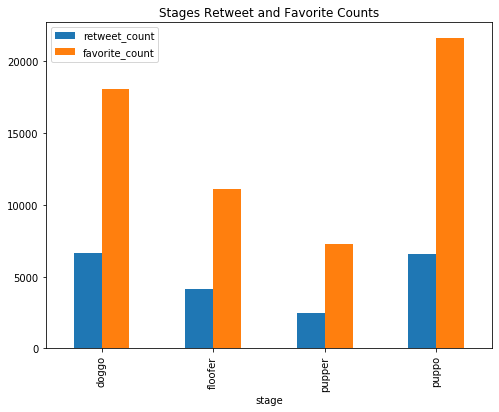

In [577]:
df_temp.plot.bar(figsize=(8, 6))
plt.title("Stages Retweet and Favorite Counts")

In [578]:
df_clean.groupby("dog_breed")[["rating"]].mean().sort_values("rating", ascending=False).head(25)


rating
dog_breed                           
Bouvier_des_Flandres        1.300000
Saluki                      1.250000
briard                      1.233333
Tibetan_mastiff             1.225000
Border_terrier              1.214286
silky_terrier               1.200000
standard_schnauzer          1.200000
Gordon_setter               1.175000
Irish_setter                1.175000
Samoyed                     1.169048
golden_retriever            1.155629
wire-haired_fox_terrier     1.150000
Australian_terrier          1.150000
Great_Pyrenees              1.146667
Pembroke                    1.142553
chow                        1.141667
Eskimo_dog                  1.140909
Norfolk_terrier             1.133333
Irish_water_spaniel         1.133333
Greater_Swiss_Mountain_dog  1.133333
Leonberg                    1.133333
Doberman                    1.133333
cocker_spaniel              1.133333
kelpie                      1.130769
Siberian_husky              1.130000

In [579]:
# In average Bedlington Terrier got the heighest retweet
df_temp = df_clean.groupby("dog_breed")[["retweet_count", "favorite_count"]].mean().sort_values("favorite_count", ascending=False).head()
df_temp

retweet_count  favorite_count
dog_breed                                          
Saluki                  5133.750000    24060.000000
Bedlington_terrier      7510.166667    21153.166667
French_bulldog          5039.677419    18416.806452
Bouvier_des_Flandres    4479.000000    18032.000000
Afghan_hound            5976.000000    17326.666667

Text(0.5, 1.0, 'Top Five Breeds According to Favorites Count')

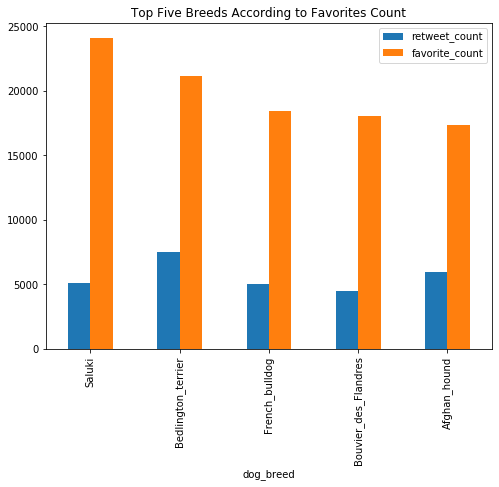

In [580]:
df_temp.plot.bar(figsize=(8, 6))
plt.title("Top Five Breeds According to Favorites Count")

In [581]:
# The most retweeted 
max_retweet = df_clean["retweet_count"].max()
df_clean.query(f"retweet_count == {max_retweet}")[["text", "dog_breed", "stage", "retweet_count", "favorite_count"]].style.set_properties(subset=['text'], **{'width': '300px'})


In [582]:
# The most favorited 
max_favorite = df_clean["favorite_count"].max()
df_clean.query(f"favorite_count == {max_favorite}")[["text", "dog_breed", "stage", "retweet_count", "favorite_count"]].style.set_properties(subset=['text'], **{'width': '300px'})
